In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [96]:
sdi_df = pd.read_csv(r"/data/notebook_files/SDI_USA.csv")

In [97]:
# Fixing incorrect data

sdi_df.drop(columns='Unnamed: 0',inplace=True)

sdi_df.at[19,'Cost of Living Plus Rent avg'] = 989.1+1062.1
sdi_df.at[22,'Cost of Living Plus Rent avg'] = 889.0+1124.0
sdi_df.at[53,'Rent avg'] = 2976-1011
sdi_df.at[13,'Rent avg'] = 2775-910


In [106]:
sdi_df['Cost of Living Plus Rent avg - 12 Months'] = sdi_df['Cost of Living Plus Rent avg']*12
sdi_df['Rent avg - 12 Months'] = sdi_df['Rent avg']*12

sdi_df

,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg,Cost of Living Plus Rent avg - 12 Months,Rent avg - 12 Months
0,"Columbus, OH",117552.0,108500.0,51260.0,13430.0,192000.0,"Columbus, OH",984.8,1421.5,2856.5,9335.4,34278.0,17058.0
1,"Seattle-Tacoma-Bellevue, WA",117323.0,131167.0,65400.0,65760.0,491600.0,"Seattle, WA",1250.7,2528.2,4091.5,8971.3,49098.0,30338.4
2,"Charlotte-Concord-Gastonia, NC-SC",114122.0,107046.0,51000.0,12800.0,208500.0,"Charlotte, NC",989.9,1974.5,3221.1,8939.8,38653.2,23694.0
3,"Colorado Springs, CO",112118.0,111670.0,51430.0,5780.0,296500.0,"Colorado Springs, CO",1049.2,1594.0,3094.5,8493.1,37134.0,19128.0
4,"Dayton, OH",111616.0,99338.0,50100.0,4240.0,124100.0,"Dayton, OH",961.2,1072.1,2586.0,4887.7,31032.0,12865.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Cleveland-Elyria, OH",89040.0,80314.0,50470.0,8220.0,146500.0,"Cleveland, OH",1065.5,1355.1,2973.1,7732.9,35677.2,16261.2
73,"Miami-Fort Lauderdale-West Palm Beach, FL",88249.0,95662.0,48240.0,13740.0,283400.0,"Miami, FL",1102.1,2494.4,3775.8,5782.4,45309.6,29932.8
74,"Miami-Fort Lauderdale-West Palm Beach, FL",88249.0,95662.0,48240.0,13740.0,283400.0,"Fort Lauderdale, FL",1086.0,2171.9,3537.8,6252.0,42453.6,26062.8
75,"Eugene, OR",85912.0,84021.0,47320.0,1220.0,293900.0,"Eugene, OR",984.0,1448.0,2871.7,5443.0,34460.4,17376.0


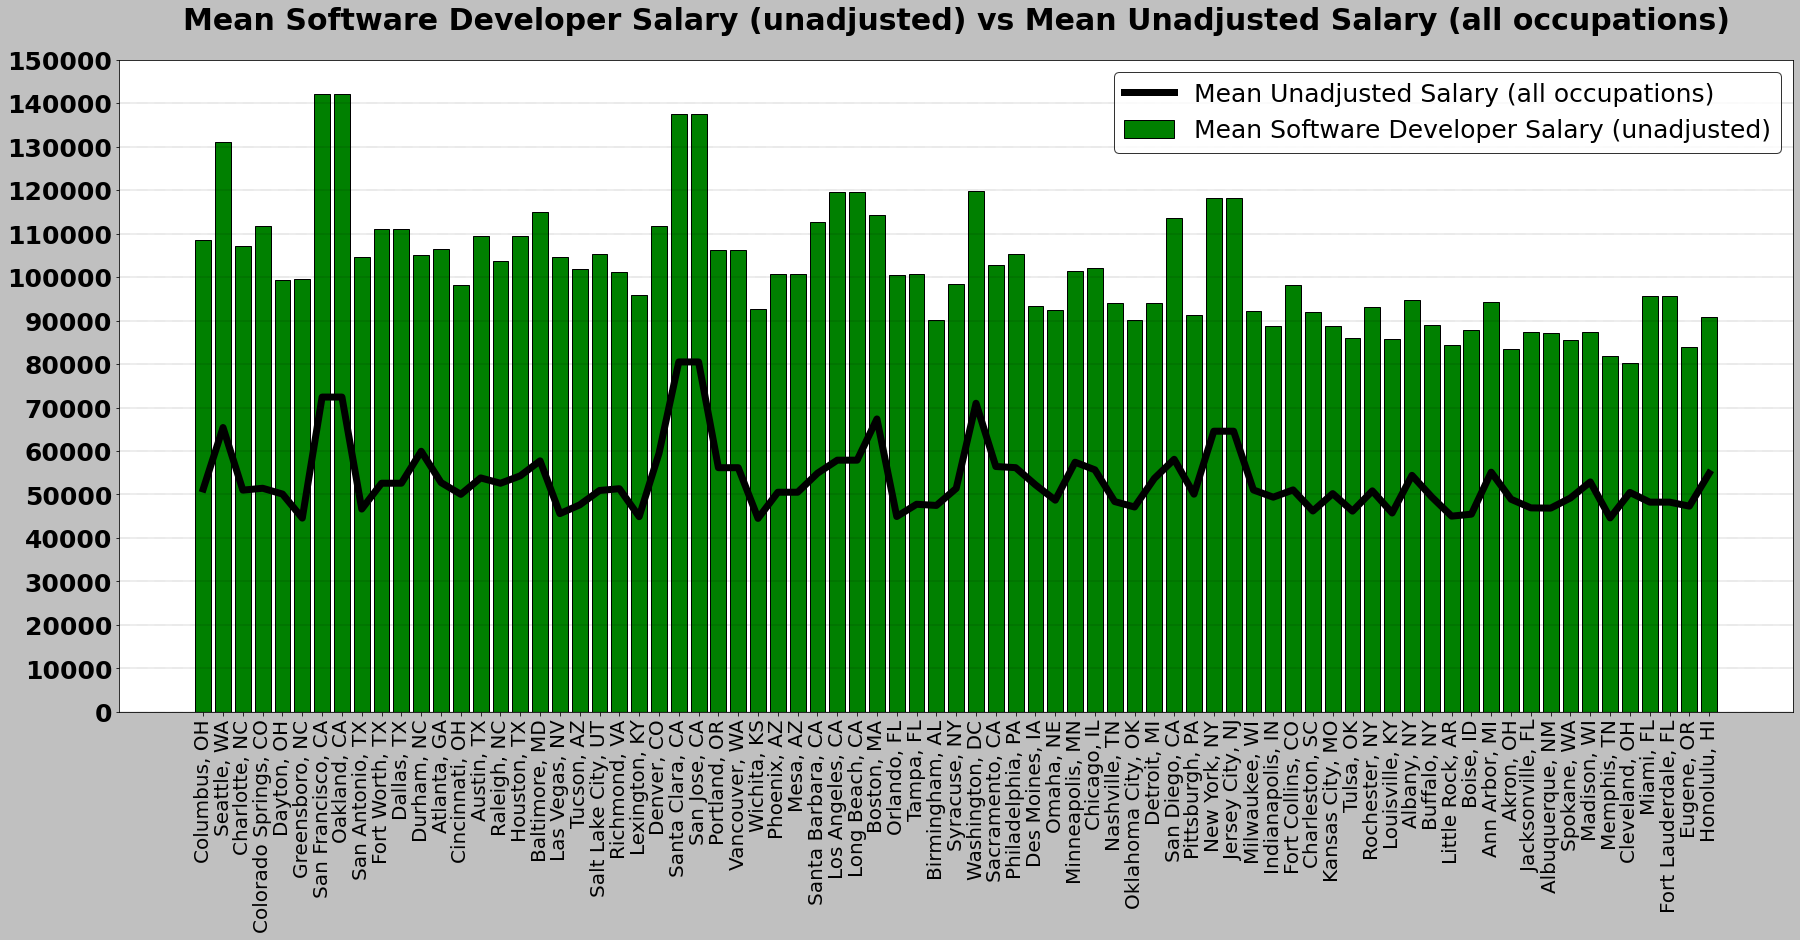

In [99]:
class UniversalPlot:
    def __init__(self,column_x,column_y1,column_y2,max_value,f_height,step,bar_color):
        self.column_x = column_x
        self.column_y1 = column_y1
        self.column_y2 = column_y2
        self.max_value = max_value
        self.f_height = f_height
        self.step = step
        self.bar_color = bar_color
        
    def draw(self):  
        fig, ax = plt.subplots(figsize=(30,self.f_height),facecolor='silver')
        ax.set_facecolor('white')
        ax.bar (self.column_x,self.column_y1, color=self.bar_color,label=self.column_y1.name,edgecolor='black')
        ax.plot (self.column_x,self.column_y2, color='black',label=self.column_y2.name, linewidth=7)
        ax.set_title(f"{self.column_y1.name} {'vs'} {self.column_y2.name}", size=30,weight='bold',pad=30)
        ax.grid(True,axis='y',color='black',linestyle='dotted',linewidth=0.4)
        ax.set_xticks(self.column_x)
        ax.set_xticklabels(self.column_x,rotation=90,size=20)
        ax.set_yticks(np.arange(0,self.max_value,step=self.step))
        ax.set_yticklabels(np.arange(0,self.max_value,step=self.step),size=25,weight='bold')
        ax.legend(fontsize=25,edgecolor='black')
        
        plt.show()


Plot1 = UniversalPlot (sdi_df['City'],
             sdi_df['Mean Software Developer Salary (unadjusted)'],
             sdi_df['Mean Unadjusted Salary (all occupations)'],160000,12,10000,'green')

Plot1.draw()

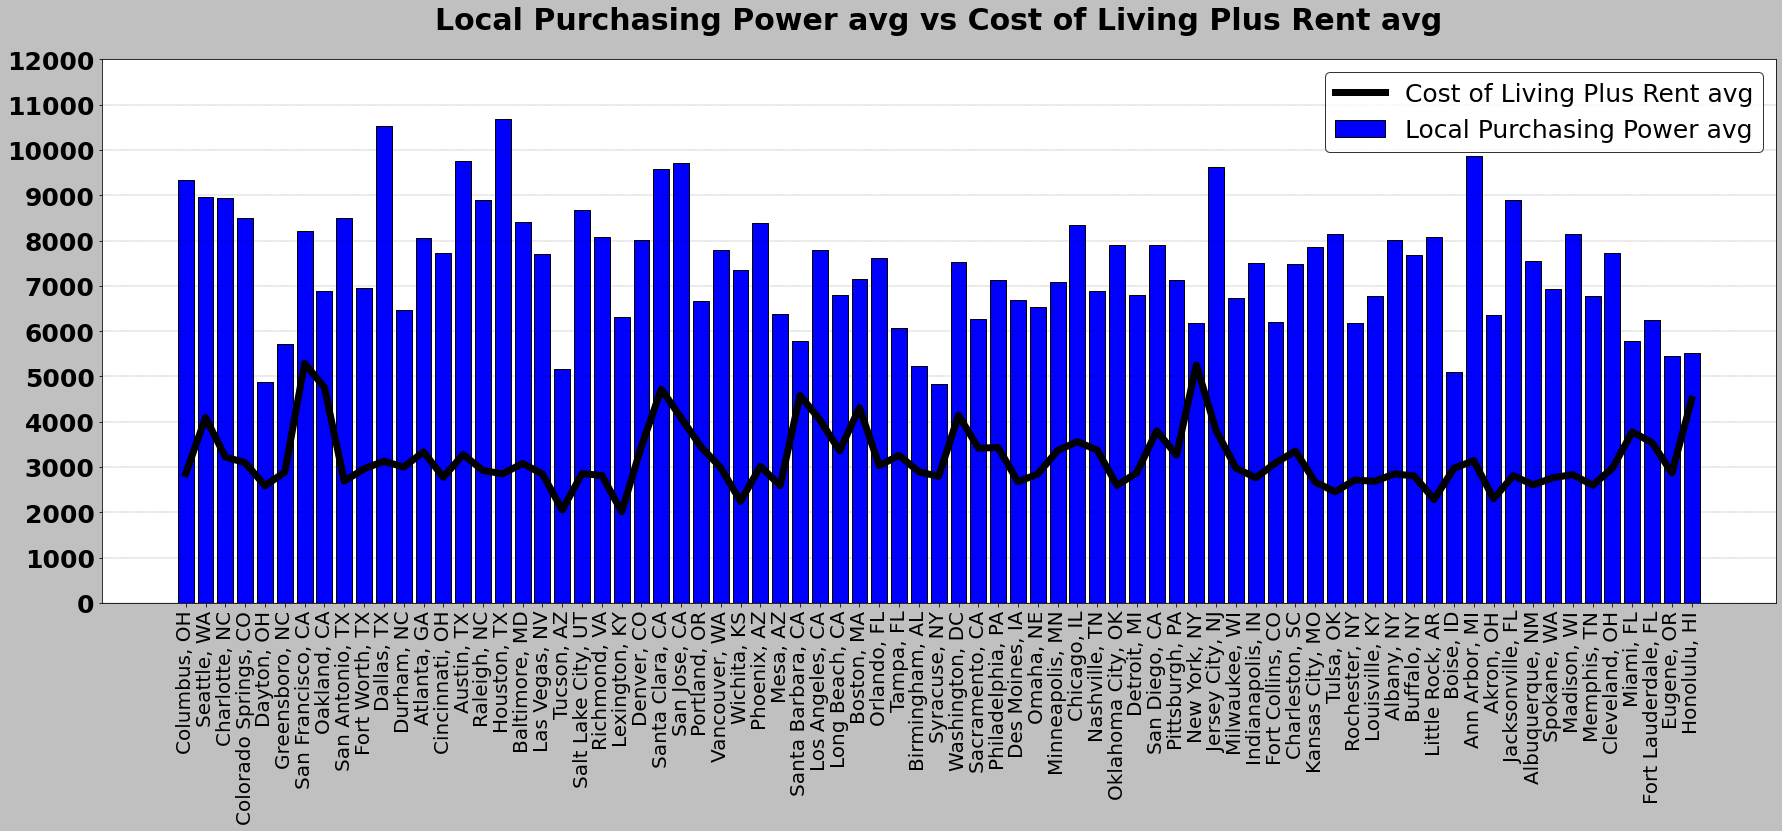

In [100]:
Plot2 = UniversalPlot (sdi_df['City'],
             sdi_df['Local Purchasing Power avg'],
             sdi_df['Cost of Living Plus Rent avg'],12500,10,1000,'blue')

Plot2.draw()

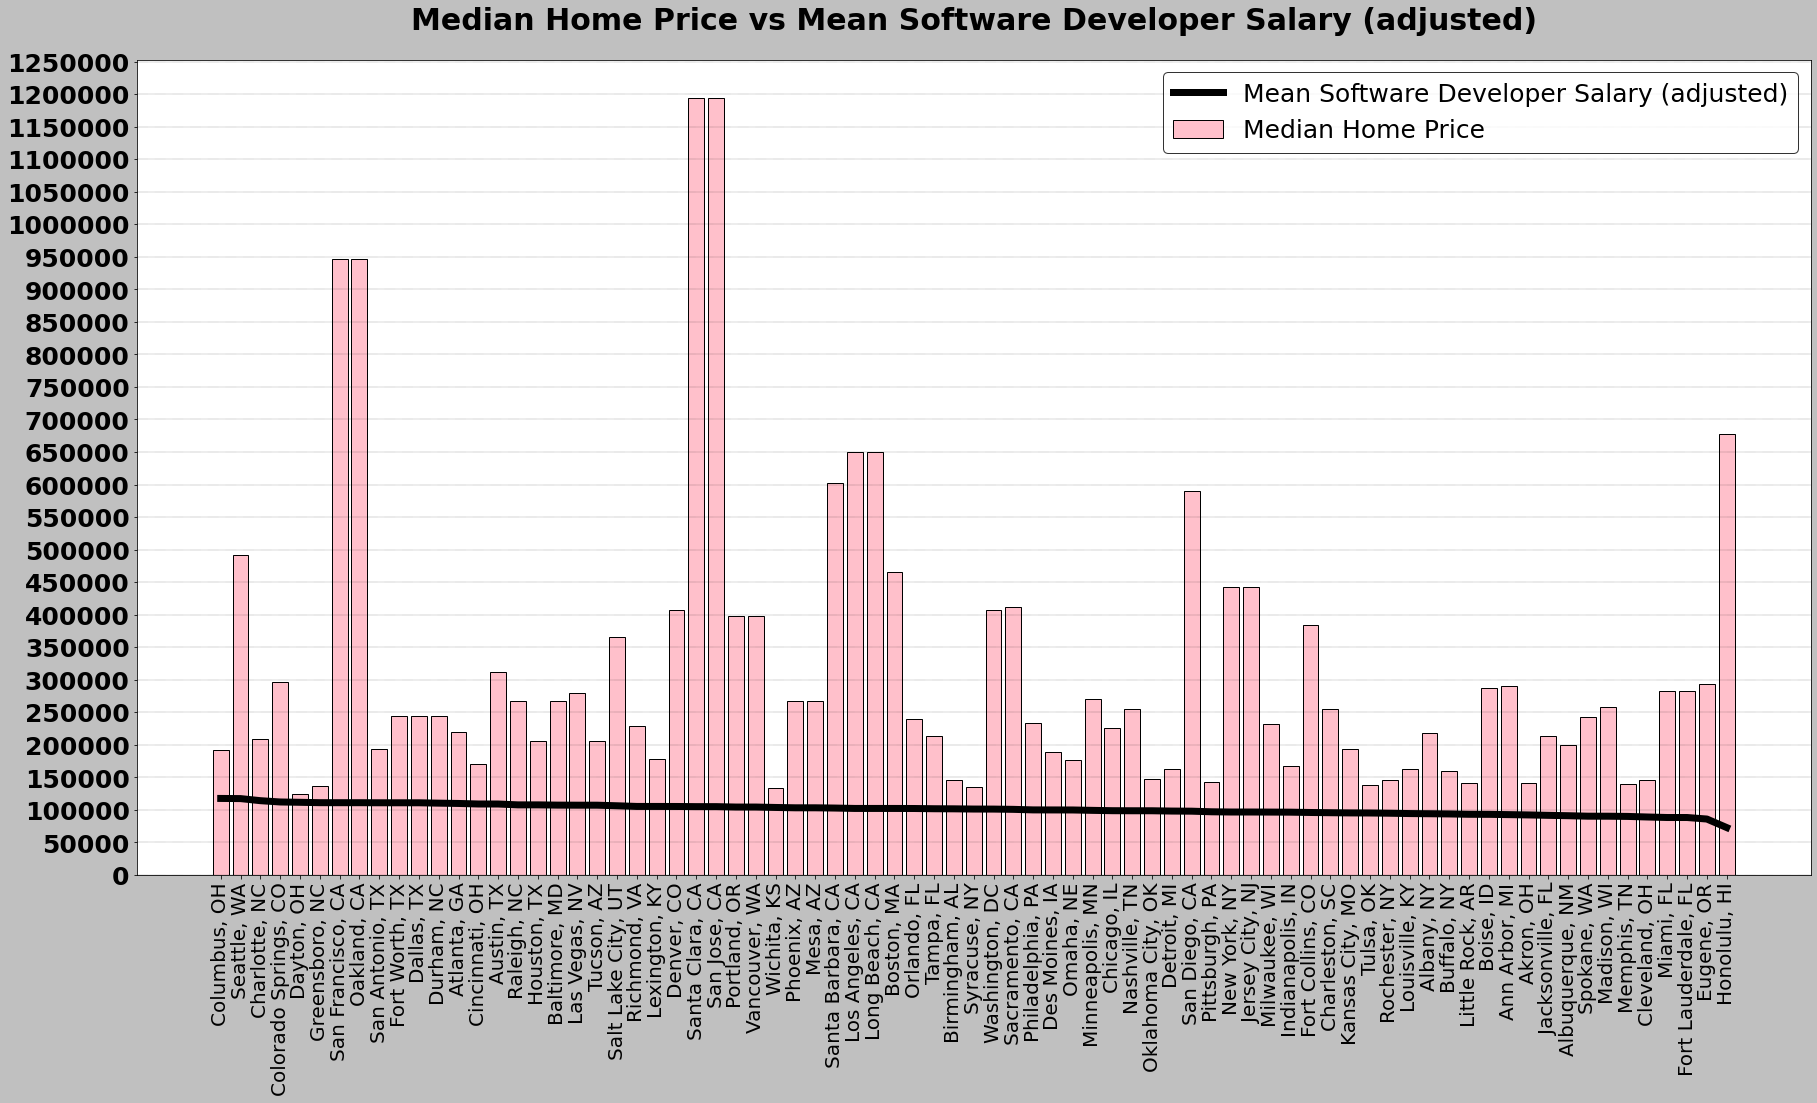

In [101]:
Plot3 = UniversalPlot (sdi_df['City'],
             sdi_df['Median Home Price'],
             sdi_df['Mean Software Developer Salary (adjusted)'],1300000,15,50000,'pink')

Plot3.draw()

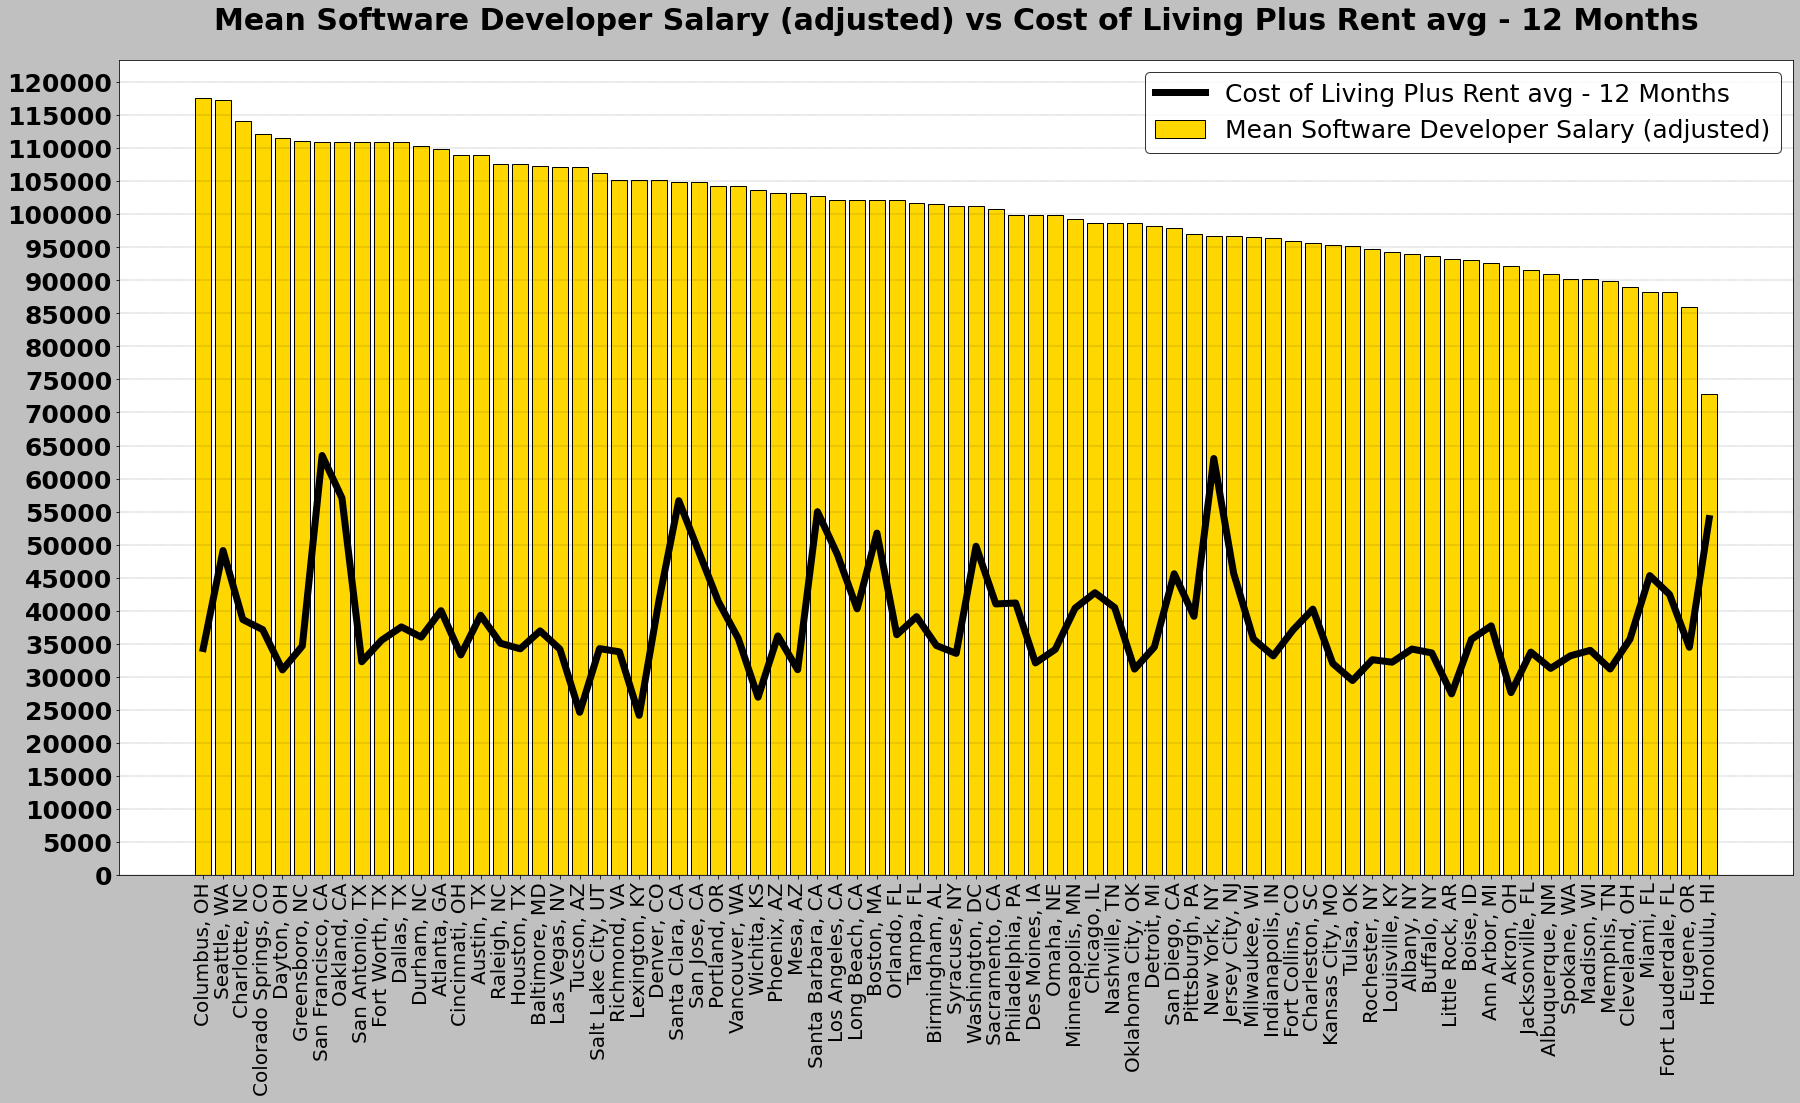

In [102]:
Plot4 = UniversalPlot (sdi_df['City'],
             sdi_df['Mean Software Developer Salary (adjusted)'],
             sdi_df['Cost of Living Plus Rent avg - 12 Months'],125000,15,5000,'gold')

Plot4.draw()

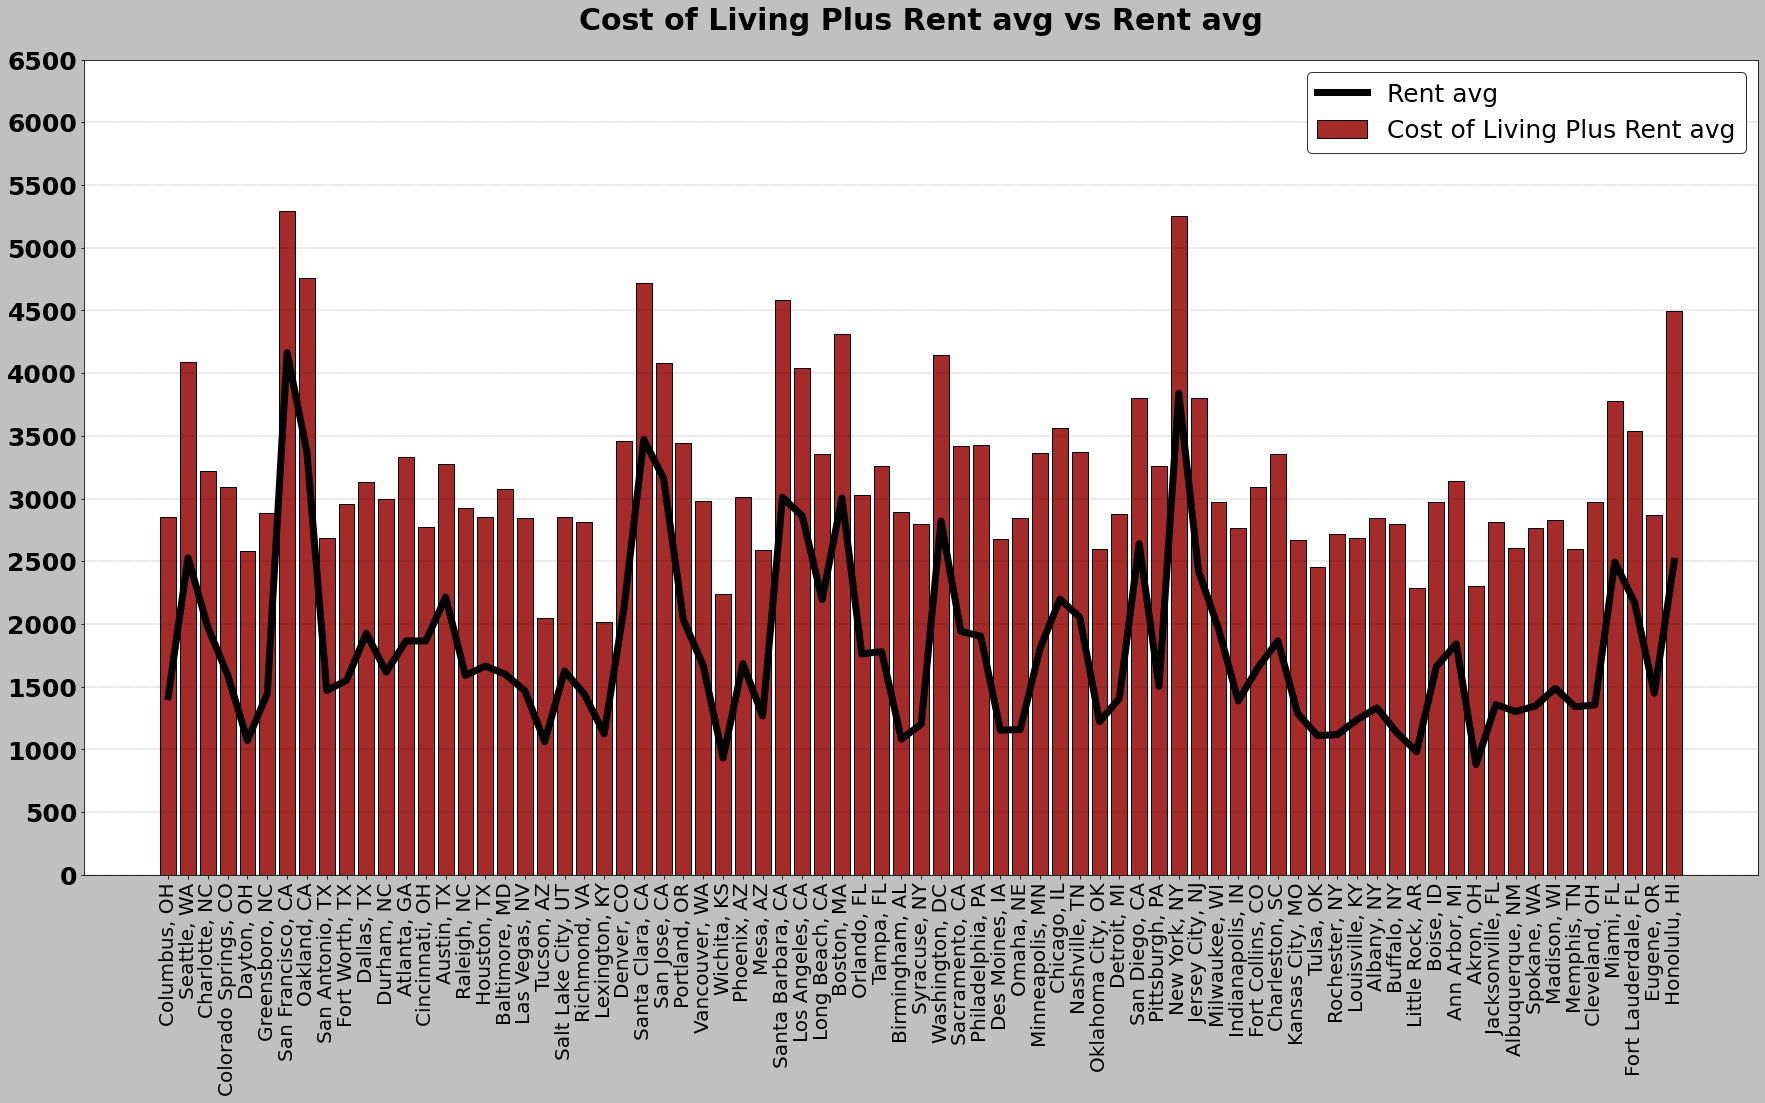

In [105]:
Plot5 = UniversalPlot (sdi_df['City'],
             sdi_df['Cost of Living Plus Rent avg'],
             sdi_df['Rent avg'],7000,15,500,'brown')

Plot5.draw()

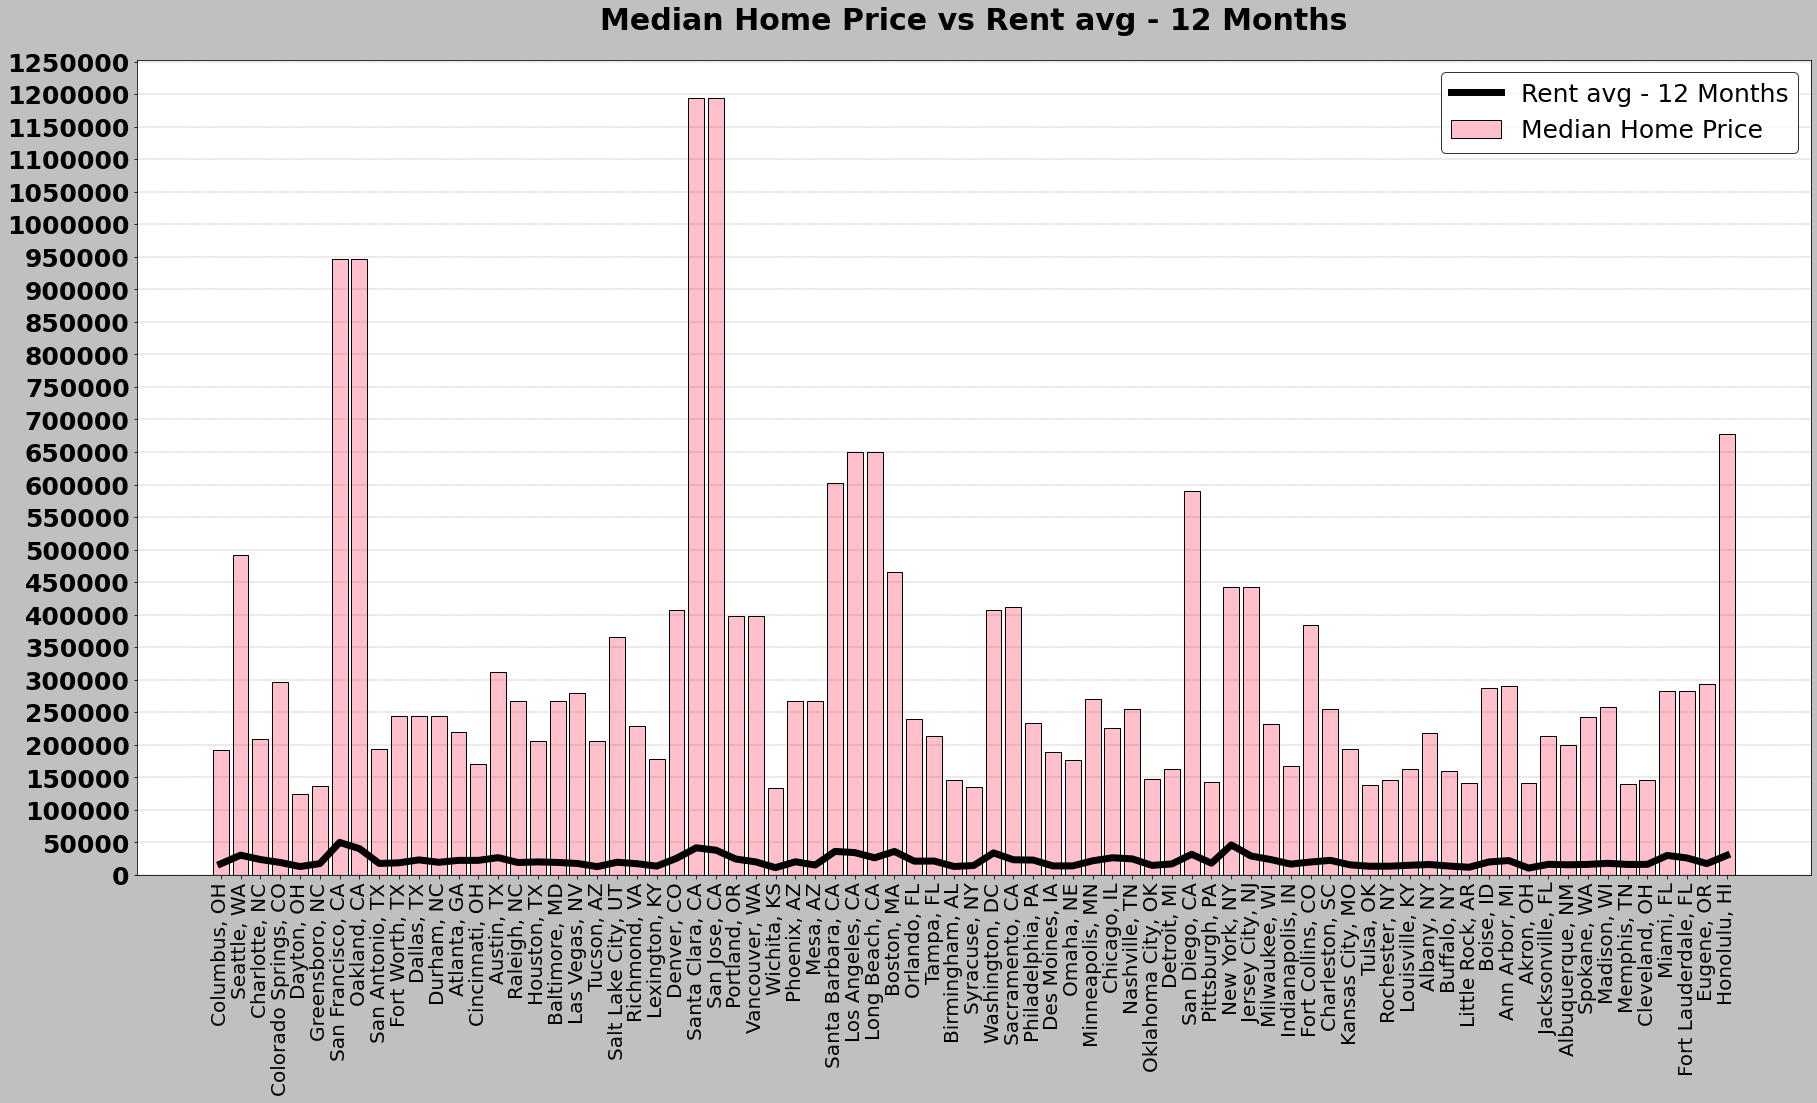

In [110]:
Plot6 = UniversalPlot (sdi_df['City'],
             sdi_df['Median Home Price'],
             sdi_df['Rent avg - 12 Months'],1300000,15,50000,'pink')

Plot6.draw()